In [1]:
import numpy as np
def activation_function(x):
    s=1/(1+np.exp(-x)) #função de ativação sigmoid
    return s
    
def derivate_activation_function(x):
    num_rows, num_cols = x.shape
    ds = np.multiply(x,np.ones((num_rows,1))-x)
    return ds #derivada da função de ativação sigmoid

In [2]:
class rn(object):
    def inicialize(self,i_nodes, h_nodes, o_nodes, learning_rate):
        self.learning_rate =  learning_rate           # Taxa de aprendizado.
        self.i_nodes = i_nodes                # Número de neurônios na camada de entrada.
        self.h_nodes = h_nodes               # Número de neurônios na camada oculta.
        self.o_nodes = o_nodes                 # Número de neurônios na camada de saída.
        # Inicia aleatoriamente as matrizes de pesos.
        self.Wi_h = np.random.random((h_nodes, i_nodes)) #gera a matriz aleatória de pesos entre a entrada e oculta
        self.Wh_o = np.random.random((o_nodes, h_nodes)) #gera a matriz aleatória de pesos entre a oculta e a saída

        self.bias_ih = np.random.random((h_nodes,1)) #gera bias randomico
        self.bias_ho = np.random.random((o_nodes,1)) #gera bias randomico
        self.etm = [] #vetor para plot
        # print("pesos i->h "+str(self.Wi_h)+" shape: "+ str(self.Wi_h.shape))
        # print("pesos h->o "+str(self.Wh_o)+" shape: "+ str(self.Wh_o.shape))
        # print("bias i->h "+str(self.bias_ih)+" shape: "+ str(self.bias_ih.shape))
        # print("bias h->o "+str(self.bias_ho)+" shape: "+ str(self.bias_ho.shape))
        
    def feed_forward(self, inp):
        self.hidden = self.Wi_h.dot(inp.transpose())+self.bias_ih
        self.hidden_activate = activation_function(self.hidden) #PesosXEntrada  acrescenta o bias
        # Incluindo o bias. Saída da camada escondida é a entrada da camada de saída.
        self.output = self.Wh_o.dot(self.hidden_activate)+self.bias_ho
        self.output_activate = activation_function(self.output) #PesosXoculta acrescenta o bias função de ativação / 
        # Neural network output
        return self.output_activate

    def backpropagate(self, inp,expected):
        erro_output = expected- self.output_activate
        d_output = derivate_activation_function(self.output_activate) #derivada da saida
        d_hidden = derivate_activation_function(self.hidden_activate) #derivada da oculta
        Wh_o_T = self.Wh_o.transpose() #pesos oculta transposta
        hidden_T = self.hidden_activate.transpose() #oculta transposta        
        erros_hidden = np.dot(Wh_o_T,erro_output) #erro da oculta
        # Error backpropagation.   
        # Cálculo do gradiente na camada de saída.
        gradient_ho = np.multiply(erro_output,d_output)*self.learning_rate
        delta_ho = np.dot(gradient_ho,hidden_T)
        gradient_ih = np.multiply(erros_hidden,d_hidden)*self.learning_rate
        delta_ih = np.dot(gradient_ih, inp)
        #adjust bias
        self.bias_ho = self.bias_ho + gradient_ho
        self.bias_ih = self.bias_ih + gradient_ih
        # Atualização dos pesos.
        self.Wi_h = self.Wi_h +delta_ih
        self.Wh_o = self.Wh_o +delta_ho
        return erro_output

    def train(self,epochs, inputs, expected):
        self.etm = np.zeros(epochs)
        err=1
        for i in range(epochs):
            for j in range(len(inputs)):
                output = self.feed_forward(inputs[j])
                erro_output=self.backpropagate(inputs[j],expected[j])
            self.etm[i]=erro_output
            err = np.mean(np.multiply(erro_output,erro_output))/2
            if err<0.0002:
                print("erro satisfeito")
                break	
            
    def predict(self,inputs, expected):
        output_to_plot =  np.zeros(len(inputs))
        expected_to_plot = np.zeros(len(inputs))
        for j in range(len(inputs)):
            output_activate = self.feed_forward(inputs[j])
            output_to_plot[j]=output_activate
            expected_to_plot[j]=expected[j] #0 pois tem só uma saída
            print("saída | esperado ->",str(output_activate)," | ",str(expected[j]))
        return output_to_plot,expected_to_plot

erro satisfeito


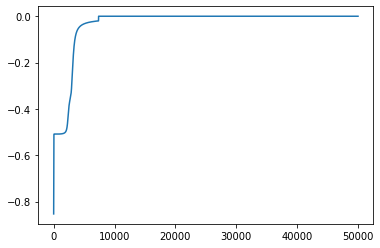

In [3]:
import matplotlib.pyplot as plt
# ===============================================================
# TREINAMENTO.
# ===============================================================
# Entrada 
inputs = np.matrix([
            [1, 1, 1],
            [1, 1, 0],
            [1, 0, 1],
            [1, 0, 0],
            [0, 1, 1],
            [0, 1, 0],
            [0, 0, 1],
            [0, 0, 0]])
# Vetor de resultado desejado.
expected = np.matrix([
            [1],
            [0],
            [0],
            [1],
            [0],
            [1],
            [1],
            [0]])
err=1
rn1 = rn()
rn1.inicialize(3, 4, 1, 0.1)
rn1.train(50000,inputs,expected)

# print("Erro Total Médio = " + str(Etm))
plt.plot(rn1.etm)
plt.show()

saída | esperado -> [[0.97956599]]  |  [[1]]
saída | esperado -> [[0.00985924]]  |  [[0]]
saída | esperado -> [[0.02405044]]  |  [[0]]
saída | esperado -> [[0.97525549]]  |  [[1]]
saída | esperado -> [[0.02217398]]  |  [[0]]
saída | esperado -> [[0.97334784]]  |  [[1]]
saída | esperado -> [[0.98879705]]  |  [[1]]
saída | esperado -> [[0.019994]]  |  [[0]]


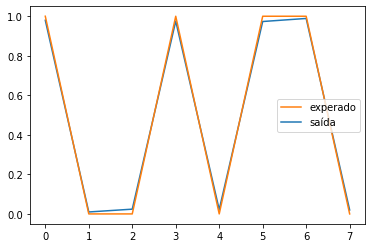

In [7]:
# teste
test = rn1.predict(inputs,expected)
ax = plt.subplot(1,1,1)
p1, = ax.plot(test[0], label="saída")
p2, = ax.plot(test[1], label="experado")
handles, labels = ax.get_legend_handles_labels()
# or sort them by labels
import operator
hl = sorted(zip(handles, labels),
            key=operator.itemgetter(1))
handles2, labels2 = zip(*hl)
ax.legend(handles2, labels2)